In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-200-highest-grossing-movies/Top 200 Highest Grossing Movies.csv


In [2]:
df=pd.read_csv('../input/top-200-highest-grossing-movies/Top 200 Highest Grossing Movies.csv')
df

,Rank,Title,Lifetime Gross,Year
0,1,Avatar,"$2,847,397,339",2009
1,2,Avengers: Endgame,"$2,797,501,328",2019
2,3,Titanic,"$2,201,647,264",1997
3,4,Star Wars: Episode VII - The Force Awakens,"$2,069,521,700",2015
4,5,Avengers: Infinity War,"$2,048,359,754",2018
...,...,...,...,...
195,196,Detective Chinatown 2,"$544,185,156",2018
196,197,X-Men: Apocalypse,"$543,934,105",2016
197,198,Sherlock Holmes: A Game of Shadows,"$543,848,418",2011
198,199,Despicable Me,"$543,157,985",2010


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rank            200 non-null    int64 
 1   Title           200 non-null    object
 2   Lifetime Gross  200 non-null    object
 3   Year            200 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 6.4+ KB


In [4]:
##changing datatype of Lifetime Gross column from object to Integer to perform calulations.
df['Lifetime Gross']=df['Lifetime Gross'].replace('[$,]','',regex=True).astype(int) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rank            200 non-null    int64 
 1   Title           200 non-null    object
 2   Lifetime Gross  200 non-null    int64 
 3   Year            200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [5]:
##top 10 movies with highest lifetime collections

df1=df[['Title','Lifetime Gross']].copy()
df2=df1.sort_values('Lifetime Gross',ascending=False).head(10)
df2

,Title,Lifetime Gross
0,Avatar,2847397339
1,Avengers: Endgame,2797501328
2,Titanic,2201647264
3,Star Wars: Episode VII - The Force Awakens,2069521700
4,Avengers: Infinity War,2048359754
5,Spider-Man: No Way Home,1901218408
6,Jurassic World,1671537444
7,The Lion King,1663250487
8,The Avengers,1518815515
9,Furious 7,1515341399


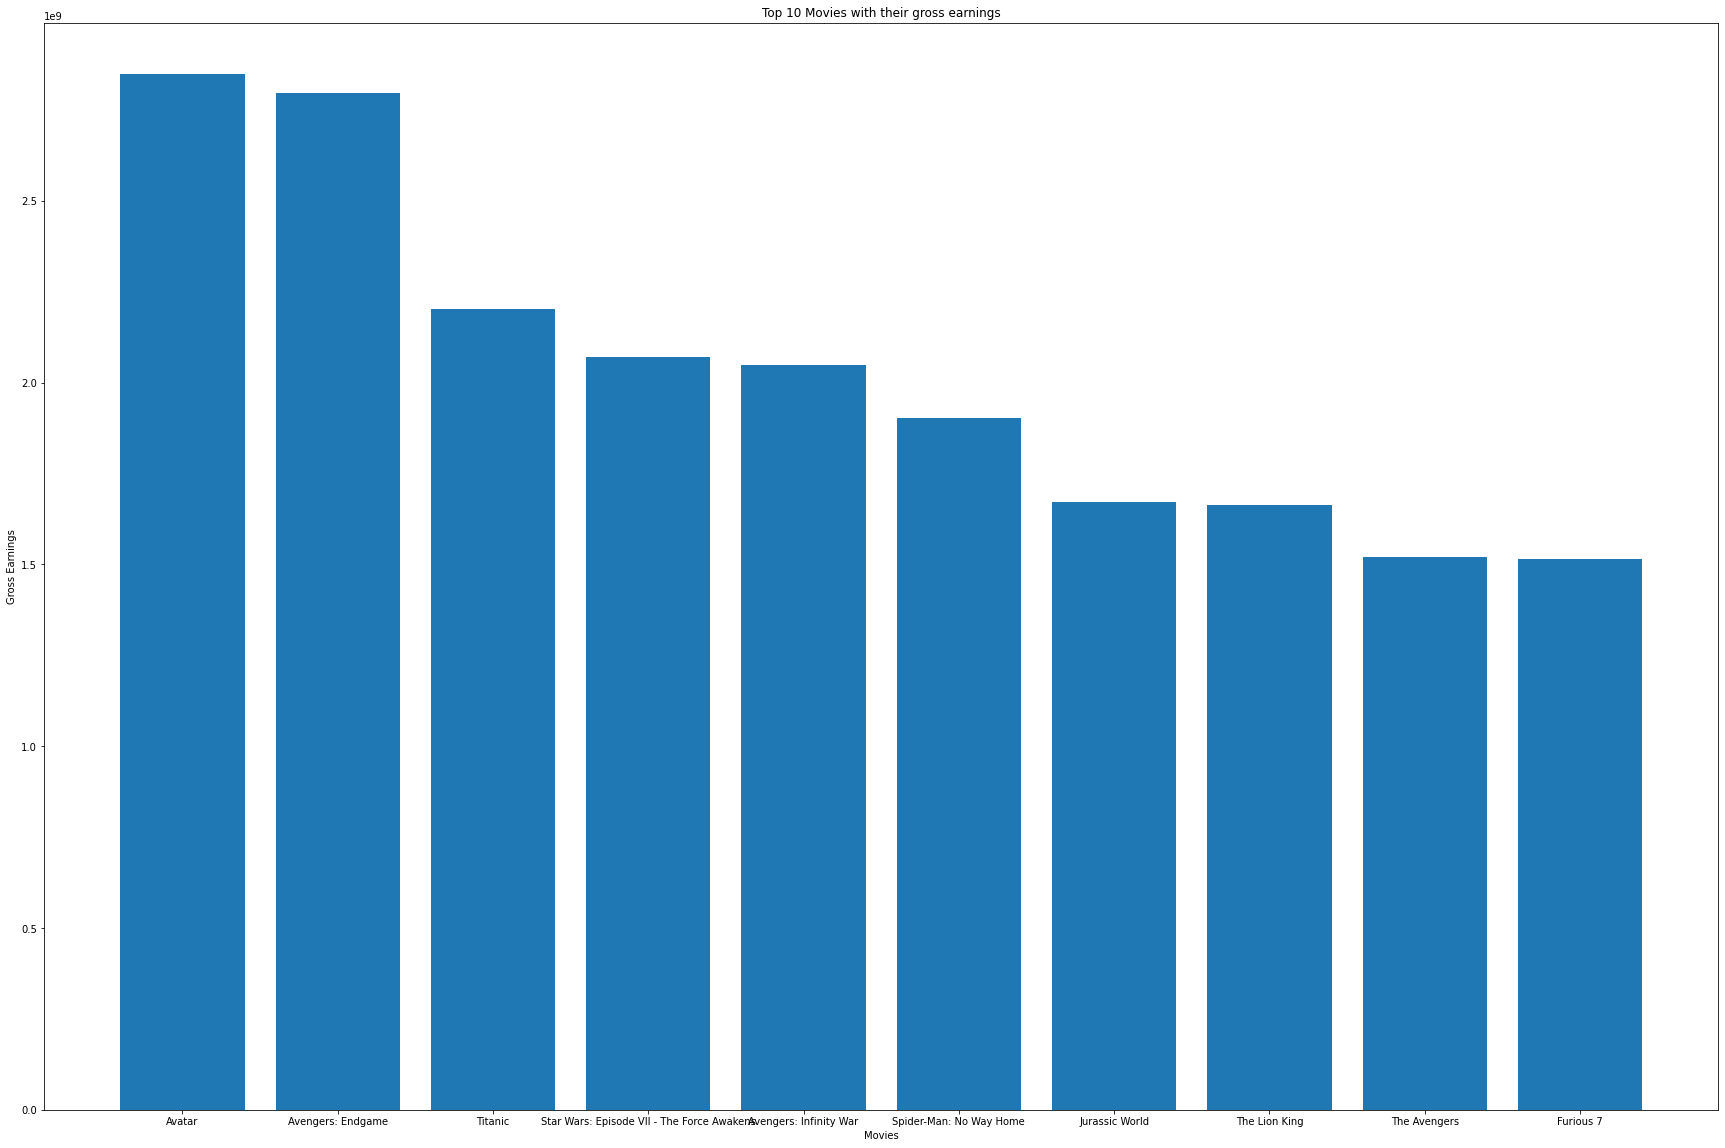

In [6]:
##plotting a bar graph for the top 10 movies along with their collection

import matplotlib.pyplot as plt
import seaborn as sns

x=list(df2['Title'])
y=list(df2['Lifetime Gross'])
plt.figure(figsize=(30,20))
plt.title('Top 10 Movies with their gross earnings')
plt.bar(x,y)
plt.xlabel('Movies')
plt.ylabel('Gross Earnings')
plt.show()

In [7]:
##total number of movies released in different years

df3=df.groupby(by='Year')['Title'].count()
df3

Year
1977     1
1982     1
1993     1
1994     2
1996     1
1997     3
1998     1
1999     2
2000     1
2001     3
2002     4
2003     4
2004     6
2005     5
2006     5
2007     7
2008     8
2009     7
2010     9
2011    12
2012    12
2013    11
2014    13
2015    12
2016    15
2017    17
2018    14
2019    13
2021     6
2022     4
Name: Title, dtype: int64

In [8]:
##Films in 2010 in descending order according to their lifetime gross income

df4=df[df['Year']==2010]
df4

,Rank,Title,Lifetime Gross,Year
35,36,Toy Story 3,1066970811,2010
44,45,Alice in Wonderland,1025468216,2010
49,50,Harry Potter and the Deathly Hallows: Part 1,977070383,2010
81,82,Inception,836848102,2010
112,113,Shrek Forever After,752600867,2010
132,133,The Twilight Saga: Eclipse,698491347,2010
159,160,Iron Man 2,623933331,2010
172,173,Tangled,592462816,2010
198,199,Despicable Me,543157985,2010


In [9]:
df5=df4[['Title','Lifetime Gross']].copy()
df5=df5.sort_values('Lifetime Gross',ascending=True)
df5

,Title,Lifetime Gross
198,Despicable Me,543157985
172,Tangled,592462816
159,Iron Man 2,623933331
132,The Twilight Saga: Eclipse,698491347
112,Shrek Forever After,752600867
81,Inception,836848102
49,Harry Potter and the Deathly Hallows: Part 1,977070383
44,Alice in Wonderland,1025468216
35,Toy Story 3,1066970811


In [10]:
##film with the highest gross income

a=max(df['Lifetime Gross'])
a

2847397339

In [11]:
##title of the film with highest lifetime gross
res=df.Title[df['Lifetime Gross']==a]
res

0    Avatar
Name: Title, dtype: object

In [12]:
b=min(df['Lifetime Gross'])
b

542358331

In [13]:
##film with lowest lifetime gross income
res=df.Title[df['Lifetime Gross']==b]
res

199    Cinderella
Name: Title, dtype: object

In [14]:
df6=df4=df[df['Year']==2017]
df6

,Rank,Title,Lifetime Gross,Year
14,15,Star Wars: Episode VIII - The Last Jedi,1332698830,2017
17,18,Beauty and the Beast,1273576220,2017
19,20,The Fate of the Furious,1236005118,2017
41,42,Despicable Me 3,1034800131,2017
52,53,Jumanji: Welcome to the Jungle,962542945,2017
69,70,Spider-Man: Homecoming,880166924,2017
74,75,Wolf Warrior 2,870325439,2017
77,78,Guardians of the Galaxy Vol. 2,863756051,2017
80,81,Thor: Ragnarok,853983879,2017
85,86,Wonder Woman,822854286,2017


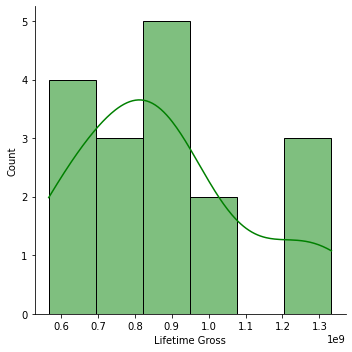

0.7294675364008802


In [15]:
##checking the frequency didtribution of gross income of films in 2017

sns.displot(df6['Lifetime Gross'],color='green',kde=True)
plt.show()
print(df6['Lifetime Gross'].skew(axis=0))

###The gross income of films for year 2017 is moderately right skewed. 